# Natural Language Processing

![](imgs/nlp_intro.png)

***
###### Fonte:https://medium.com/greyatom/introduction-to-natural-language-processing-78baac3c602b



## O que vem na cabeça de vocês quando falamos de Processamento de Linguagem Natural?


###### Starts from 19h15


###### Lembra de tentar antecipar as coisas que vc achar pra dar tempo de fomentar discussão de RF

## Definição

O termo NLP (Natural Laguage Processing, ou Processamento de Linguagem Natural em tradução livre) é um campo da computação relativamente novo e que tem como principal foco fazer com que as máquinas entendam e até possam se comunicar em linguagem humana. É uma área de pesquisa/atuação extremamente ampla, podendo se dividir em ramos com atuações muito diferentes. Alguns dos principais exemplos de atuação são:

- Information Retrieval: Com base em uma query do usuário, retornar o produto/documento que atenda suas expectativas (**Google**)
- Q&A: Com base em uma pergunta, encontrar a resposta que mais atenda ela (**Watson/Jeopardy**)
- Machine Translation: entrar uma linguagem em um idioma e traduzí-la (**Google Translate**)
- Information Extraction: 
![](imgs/avril_height.png)
- Sentiment Analysis: é o que veremos hoje !


<img src="imgs/yeah_gif.gif" align="center"/>

# Contextualizando

Suponha que você seja um Cientista de Dados e trabalha em um app de um restaurante. Você conseguiu coletar os reviews de alguns dos seus clientes e pretende pensar como que você agrega valor com eles. **

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999
pd.read_csv('data/raw/raw_reviews.csv').sample(5)

,text
63,Believe it baby!
129,$20 for all you can eat sushi cannot be beaten.
266,i love their chicken pasta cant remember the name but is sooo good
50,Save yourself the time and trouble and skip this one!
308,If you're in the area you shouldn't be disappointed.


Faça um sample dos dados e explore um pouco eles. Entenda que tipo de informação você tem e o que você consegue fazer com ela.

###### Time to be used: 5 mins

In [2]:
pd.read_csv('data/raw/raw_reviews.csv').sample(15)

,text
245,"Delicious, creative and fun."
349,I don't know if I'll be back....
11,Decor needs to be upgraded but the food is amazing!
57,Very pleased
113,And the service was simply spendid - quite a delight.
351,NO PIZZA 33 for me!
331,Nice job!
203,We will go back every time we are in the City.
60,"Try the Pad Thai, or sample anything on the appetizer menu...they're all delicious."
69,Highly recommended.


## O que os reviews querem dizer?

Parecem opiniões a respeito de pessoas que foram no nosso restaurante !

***

###### **Na verdade, esse conjunto de dados é composto de reviews de restaurantes e foi modificado a partir do dataset usado no workshop SemEval (International Workshop on Semantic Evaluation) na [edição de 2016](http://alt.qcri.org/semeval2016/task5/).

# Tá mas e daí?

Se vocês tentarem interpretar o conteúdo, vocês verão que os reviews retratam **opiniões**. Extrapolando um pouco, da pra ver que essas opiniões estão bem **polarizadas** ou em algo *positivo* ou em algo *negativo*. Ora, vocês reconhecem esse tipo de trabalho? E se anotássemos as labels em categorias (positiva ou negativa) e construíssimos um *classificador* para esses reviews?

Ou seja, nosso modelo irá receber um **texto** como *feature* e irá retornar uma **classe**: positiva ou negativa. Ou seja, nosso modelo irá **analisar o sentimento** expresso por um certo texto !


In [3]:
train_df = pd.read_csv('data/processed/train.csv')
test_df = pd.read_csv('data/processed/test.csv')

display(train_df.head())

,text,polarity
0,"It is nearly impossible to get a table, so if you ever have the chance to go here for dinner, DO NOT pass it up.",positive
1,I won't go back unless someone else is footing the bill.,negative
2,There are so many better places to visit!,negative
3,This place is a must visit!,positive
4,but the service was a bit slow.,positive


<img src="imgs/wat-wat-wat.jpg" align="center"/>


Calma que já vamos entender tudo !

## As ferramentas

A principal biblioteca existente hoje para trabalhos de NLP é o Spacy. O datacamp lançou recentemente um [curso](https://campus.datacamp.com/courses/advanced-nlp-with-spacy) bem legal sobre ele que vale a pena dar uma conferida já que hoje, focaremos no "básico".

Outra lib que vale citar é o NLTK, principal biblioteca de NLP até alguns meses atrás.

Com o advento de deep learning, outras inciativas também ficaram famosas, como o [AllenNLP](https://allennlp.org/) e o [StanfordNLP](https://stanfordnlp.github.io/stanfordnlp/), que são capazes de atingir o estado da arte de muitas aplicações !

### O Spacy

In [4]:
# baixando o modelo de inglês
#!python -m spacy download en_core_web_sm

In [5]:
import spacy
import en_core_web_sm

No centro do Spacy tem o conceito de objeto que contém todo o pipeline de processamento, além de outras regras específicas de uma certa língua. Essa variável é comummente chamada de *nlp*. Por exemplo, para criar um objeto *nlp* da língua inglesa, basta fazer:

In [6]:
from spacy.lang.en import English
nlp = English()

Quando você processa um texto com o objecto *nlp*, o *Spacy* cria um *Doc* object.

In [7]:
doc = nlp("It's also attached to Angel's Share, which is a cool, more romantic bar...")

O *doc* permite você acessar os dados dos seus textos de maneira estruturada. A forma de iteração é de uma sequência de pytho, então:

In [8]:
for token in doc:
    print(token.text)

It
's
also
attached
to
Angel
's
Share
,
which
is
a
cool
,
more
romantic
bar
...


![](imgs/spacy_01.png)


Note que no Spacy, o objeto *Token* é um objeto que possui vários atributos. Alguns importantes/legais:

![](imgs/spacy_02.png)

## Um pouco de prática ! 

###### Time set: 15 min (should it end ~19h50)

In [9]:
# Import the Portuguese language class
from spacy.lang.pt import Portuguese

# Create the nlp object
nlp = Portuguese()

# Process a text
doc = nlp("Isso é uma sentença")

# Print the document text
print(doc.text)

Isso é uma sentença


In [10]:
# Import the Spanish language class and create the nlp object
from spacy.lang.es import Spanish
nlp = Spanish()

# Process the text
doc = nlp("Me gustan los canguros de los árboles y los narvales")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

Me


In [11]:
# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.is_digit:
        # Get the next token in the document. The index of the next token in the doc is token.i + 1.
        next_token = doc[token.i + 1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)

Percentage found: 60
Percentage found: 4


### Um pouco de estatística

É possível carregar alguns modelos pré treinados no Spacy para nos atender em alguns pontos específicos. O caso mais popular é caso queiramos analisar se determinada palavra é um verbo, ou é um nome próprio (po ex: Apple companhia ou apple, a fruta).

Esses modelos estatísticos permitem ao spacy prever atriutos linguísticos, principalmente:

- Part-of-Speech tags (classificação gramátical)
- Nomeação de Entidades (Ex: a Apple companhia, 'Play Photograph')
- Words relationship (Dependecy parser)

Tais modelos específicos estão divididos em pacotes e precisam ser baixados. O 'en_core_web_sm' é um pacote com vários modelos treinados em inglês.

In [12]:
nlp = spacy.load('en_core_web_sm')

doc = nlp("She ate the pizza")
for token in doc:
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


***

Atributos de objetos no spacy, quando sem ```_``` representam o índice deles, se não, são o texto.

In [13]:
doc = nlp("I heard Photograph from Nicklelback yesterday !")

for ent in doc.ents:
    print(ent.text, ent.label_)

Photograph ORG
Nicklelback PERSON
yesterday DATE


***
Note que Photograph está errado. Talvez poderíamos treinar o modelo segundo os nossos dados?

In [14]:
doc = nlp("I heard photograph from Nicklelback!")

for ent in doc.ents:
    print(ent.text, ent.label_)

In [15]:
doc = nlp("I took the photograph!")

for ent in doc.ents:
    print(ent.text, ent.label_)

*** 
Não temos nenhuma entidade nos dois ultimos casos

## Exercicio

Imprima as entidades da frase abaixo

###### 5 min should it end around 20h05

In [16]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print(ent.text, ent.label_)

Apple ORG


## Stopwords

Para muitas tarefas de NLP, é bom prestar atenção nas chamadas stopwords, que são as palavras mais comuns que aparecem no texto.

Como assim? Vamos tokenizar (de maneira simplista, mas note que estamos usando expressões regulares*  e imprimir as palavras mais comuns da coluna text de nosso dataset de treino.

Poderíamos usar a ideia de Matcher (ensinada no [curso](https://campus.datacamp.com/courses/advanced-nlp-with-spacy/finding-words-phrases-names-and-concepts?ex=10) do Datacamp), exclusiva do spacy, mas eu acredito que regex são uteis para varias situações !

***
###### *Para refrescar a memória, você pode usar o [regex golf](https://alf.nu/RegexGolf))

In [17]:
from collections import Counter

In [18]:
#splita as frases por palavras (espaco incluido) e soma elas
Counter(sum(train_df['text'].str.lower().str.split(r'[\W\s]+').tolist(), [])).most_common(10)

[('', 309),
 ('the', 177),
 ('a', 103),
 ('to', 97),
 ('and', 92),
 ('i', 90),
 ('is', 79),
 ('it', 75),
 ('for', 56),
 ('you', 55)]

***

O que essa regex está fazendo é basicamente convertendo todo o texto para minúsculo e depois 'splitando' em tokens sempre que o texto encontra um caracter em brando (\s) **ou** sempre que encontra um caracter que **não** é alfanumérico ([^a-zA-Z0-9]), representado pelo \W

Depois, ela pega as 10 ocorrências mais comumns.

***

É meio intuitivo o que queremos dizer com *stopwords*, correto?

No spacy, podemos encontrar as stopwords do nosso modelo assim:

In [19]:
#nlp = spacy.load('en_core_web_sm') Ja fizemos isso, so um reminder

en_stopwords = sorted([token.text for token in nlp.vocab if token.is_stop])
en_stopwords[155:161]

['no', 'nobody', 'none', 'noone', 'nor', 'not']

Lembre-se que estamos avaliando a polaridade. Então na hora de analisarmos o texto, seria  horrível perder certas stopwords como palavras de negação, afinal, "Eu não gosto disso" é muito diferente de "Eu gosto disso"!

### Exercicio

Explore um pouco a lista e analise as que você acha que podem ser excluidas.

###### 15 min (contando a discussão) - acabar no max 20h35

In [20]:
len(en_stopwords)

299

In [21]:
import random

list_idx = sorted(random.sample(range(len(en_stopwords)), 10))
sorted_sample = [en_stopwords[i] for i in list_idx]
display(sorted_sample)

['either',
 'herself',
 'hundred',
 'nor',
 'regarding',
 'same',
 'third',
 'too',
 'upon',
 'whole']

In [22]:
list_excl = ['cannot', 'go', 'never', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'nowhere', 'off']

for w in list_excl:
    nlp.vocab[w].is_stop = False

Agora, verificamos quais que removemos da lista de stopwords

In [23]:
' -- '.join([w for w in en_stopwords if not nlp.vocab[w].is_stop])

'cannot -- go -- never -- no -- nobody -- none -- noone -- nor -- not -- nothing -- nowhere -- off'

## Normalização

Uma vez que identificamos as palavras que queremos remover por serem muito comuns, agora precisamos **normalizar** o nosso texto. Em outras palavras, precisamos transformar palavras escritas de maneira diferente **no mesmo tipo de escrita**. Por exemplo: *do not*, *dont* e *don't*, apesar de terem sido escritas de maneira diferente **querem dizer a mesma coisa**. Não seria legal se transformássemos elas exatamente na mesma coisa?

O processo tradicional de normalizar texto envolve algumas etapas:

- expandir as contrações (e.g. don't -> do not);

- remover/tratar entidades; (afinal, elas podem gerar ambiguidade... pense na empresa do ipod)

- tudo letra minúscula/maiúscula

- remover pontuação

- remover stopwords


###### ideal é deixar o exercício até o break

In [24]:
import re
from utils.contractions import CONTRACTIONS_DICT
CONTRACTIONS_DICT

{"ain't": 'are not',
 "aren't": 'are not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'd've": 'he would have',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he's": 'he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'mu

Abaixo, temos uma função que pega uma certa palavra contraída e "expande" ela :)

In [25]:
def expand_contractions(text):
    if "'" in text:
        for contracted, expanded in CONTRACTIONS_DICT.items():
            text = re.sub(contracted, expanded, text, flags=re.I)
    return text

In [26]:
assert(expand_contractions("It's").lower() == 'it is')

## Exercicio !!

Crie uma função ```normalize_text``` que recebe qualquer string como entrada e faz as seguintes coisas, nessa ordem:

- converte tudo para lowercase
- expande as contracoes
- remove entidades
- remove pontuacao e stopwords


###### Resolver na volta do break

In [27]:
def remove_ents(text):
    doc = nlp(text)
    for ent in doc.ents:
        text = text.replace(ent.text, '')
    return text

In [28]:
def normalize_text(text):
    text = remove_ents(text)
    if len(text) == 0:
        return text
    doc = nlp(expand_contractions(text).lower())
    new_tokens =[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        new_tokens.append(token.text)
    return ' '.join(new_tokens)

In [29]:
assert(normalize_text("It's also attached to Angel's Share, which is a cool, more romantic bar...") == 'attached cool romantic bar')

Aplique sua função normalize_text à coluna text (dos dois dataframes, train_df e test_df), criando uma coluna nova norm_text, que será usada para treinarmos um modelo de análise de sentimento. Dica: Use o apply do pandas

In [30]:
train_df['norm_text'] = train_df['text'].apply(normalize_text)
test_df['norm_text'] = test_df['text'].apply(normalize_text)

In [31]:
train_df_unproc = train_df[train_df.text.str.len() > 0]
test_df_unproc = test_df[test_df.text.str.len() > 0]

display(len(train_df_unproc), len(test_df_unproc))

328

82

In [32]:
train_df = train_df[train_df.norm_text.str.len() > 0]
test_df = test_df[test_df.norm_text.str.len() > 0]

display(len(train_df), len(test_df))

324

80

O processo de normalização não é muito canônico (único). Você pode (e deve!) rodar as duas células acima algumas vezes para checar os resultados da normalização. Caso não se sinta satisfeito com a normalização feita, volte e edite as stopwords ou sua função de normalização até se sentir satisfeito(a) com os resultados :)

In [33]:
print("Train:\n\n")
display(train_df[['text','norm_text','polarity']].sample(n=5))
print("Test:\n\n")
display(test_df[['text','norm_text','polarity']].sample(n=5))

Train:




,text,norm_text,polarity
269,It's popular w/the late crowd.,popular w late crowd,positive
40,"Skip this restaurant, it's a big disappointment.",skip restaurant big disappointment,negative
100,I cannot imagine you not rushing out to eat there.,not imagine not rushing eat,positive
223,(2) egg custards and pork buns at either bakery on west side of Mott street just south of Canal.,egg custards pork buns bakery west mott street south,negative
312,"How this place survives the competitive west village market in this economy, or any other for that matter, is beyond me.",place survives competitive west village market economy matter,negative


Test:




,text,norm_text,polarity
58,What more can you ask for?,ask,positive
62,Great survice,great survice,positive
70,I'm glad I was introduced to this place and this is a rare gem in NY.,glad introduced place rare gem,positive
54,You will not be disapointed at all.,not disapointed,positive
40,Big thumbs up!,big thumbs,positive


# O Modelo

<img src="imgs/relief.gif" align="center"/>

Depois de todo esse trabalho de **pré processamento**, podemos finalmente nos dedicar ao modelos. Mas **ué** como que fazemos esses textos features?

**Lembrem-se sempre**. Computadores entendem apenas números. O que temos que fazer, então, é transformar os nossos dados em números !


Mas como??? E se usássemos um dicionário?

In [34]:
examples_for_bow = [
    'camisa preta botao botao botao',
    'botao feito linha preta',
    'considera-se caro preco botao camisa botao',
    'linha costurar botão mesma camisa',
    'costurar linha camisa mesma botao'
]

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

#estamos selecionando até 5 features
cv = CountVectorizer(max_features=5, strip_accents='unicode', binary=True)

bow_matrix = cv.fit_transform(examples_for_bow)
bow_matrix

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [36]:
bow_matrix.todense()

matrix([[1, 1, 0, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=int64)

In [37]:
pd.DataFrame(bow_matrix.todense(), columns=sorted(cv.vocabulary_.items(), key=lambda item: item[1]))

,"(botao, 0)","(camisa, 1)","(costurar, 2)","(linha, 3)","(mesma, 4)"
0,1,1,0,0,0
1,1,0,0,1,0
2,1,1,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1


Esse tipo de codificação não leva em conta as frequências das palavras, mas apenas a presença delas no texto (sem contar a ordem). Esse tipo de modelo é conhecido como *sacola de palavras* ou **Bag of Words**

## Exercicio

Monte um pipeline (criando um objeto do tipo [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)), que inclua a transformação do texto em features numéricas (CountVectorizer) e o classificador LogisticRegression. Treine o modelo usando esse pipeline com os dados de input de train_df. Encontre a probabilidade do texto de pertencer a cada sentimento.

Dica: Lembre-se de transformar o target (coluna polarity) em 0s e 1s - 0 para negative e 1 para positive.

###### Dica 2: https://medium.com/@baemaek/text-mining-preprocess-and-naive-bayes-classifier-da0000f633b2


###### A hora tem que ser entre 21h10 e 21h30


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [39]:
train_df['y'] = (train_df['polarity'] == 'positive').astype(int)
test_df['y'] = (test_df['polarity'] == 'positive').astype(int)

In [40]:
train_df[train_df['y']==1].sample(3)

,text,polarity,norm_text,y
150,Thank you,positive,thank,1
141,A guaranteeed delight!,positive,guaranteeed delight,1
49,Love YUKA.,positive,love yuka,1


In [41]:
train_df[train_df['y']==0].sample(3)

,text,polarity,norm_text,y
279,"Oh, and I never write reviews--I just was so moved by how bad this place was, I felt it was my duty to spread the word.",negative,oh never write reviews moved bad place felt duty spread word,0
84,Shame on this place for the horrible rude staff and non-existent customer service.,negative,shame place horrible rude staff non existent customer service,0
107,DO not try unless you're just going there to hang out like the rest of the hipsters who apparently have no sense of taste.,negative,not try going hang like rest hipsters apparently no sense taste,0


In [55]:
steps = [
    ('vect', CountVectorizer(binary=True)),
    ('clf', LogisticRegression())
]

pipeline = Pipeline(steps)

In [56]:
X_train = train_df['norm_text'].values
y_train = train_df['y'].values

In [57]:
sentiment_analyzer = pipeline.fit(X_train, y_train)

In [58]:
sentiment_analyzer.predict(["It's also attached to Angel's Share, which is a cool, more romantic bar..."])

array([1])

E se quisermos ver a probabilidade? As vezes importa mais do que a classe...

In [59]:

sentiment_analyzer.predict_proba(["It's also attached to Angel's Share, which is a cool, more romantic bar..."])

array([[ 0.11482138,  0.88517862]])

## Avaliando o resultado

Nos dados de teste, faça a predição da coluna norm_text e compare o resultado com o vetor target (coluna polarity em 0s e 1s).

Dica: Imprima o [classification_report](https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) e a [matriz de confusão](https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

Mais importante que o nosso modelo, é entendermos qual métrica queremos melhorar. O que é mais importante aqui? Discutam em grupos !

Vamos apresentar isso para os stakeholders !


###### 15 min pra deixar codarem (até 21h45)

###### 15~20 min de discussão (22h00)

In [60]:
X_test = test_df['norm_text'].values
y_test = test_df['y'].values

In [61]:
y_pred = sentiment_analyzer.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

class_names = ['negative', 'positive']

In [63]:
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

   negative       0.60      0.26      0.36        23
   positive       0.76      0.93      0.83        57

avg / total       0.71      0.74      0.70        80



In [64]:
from utils.confusion_matrix import plot_confusion_matrix

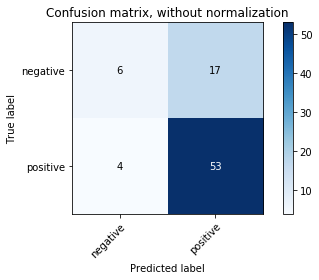

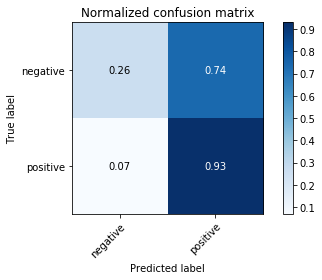

In [65]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization');

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix');

# Mas dá pra melhorar?

Note que se usássemos binary=False, estaríamos contando as ocorrências das palavras


###### 5 min (22h05)

In [66]:
steps = [
    ('vect', CountVectorizer(binary=False)),
    ('clf', LogisticRegression())
]

pipeline = Pipeline(steps)

In [67]:
sentiment_analyzer = pipeline.fit(X_train, y_train)

In [68]:
y_pred = sentiment_analyzer.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

   negative       0.67      0.35      0.46        23
   positive       0.78      0.93      0.85        57

avg / total       0.75      0.76      0.74        80



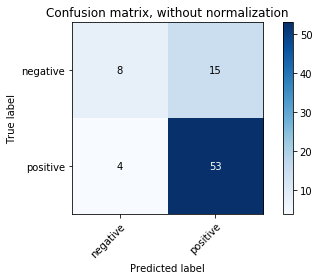

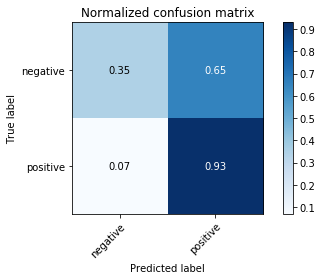

In [70]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization');

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix');

Melhoramos o Recall do Negativo !

## Mais feature Engineering

Compare os casos BoW e Term Frequency. Dá pra melhorar?

Sim ! Dê uma olhada no [Tf-Idf](https://pt.wikipedia.org/wiki/Tf%E2%80%93idf), que é uma métrica mais "contextual" e implemente sua versão. Avalie os resultados.

[Dica](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

###### 22h20

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

steps = [
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression())
]

pipeline = Pipeline(steps)

In [75]:
sentiment_analyzer = pipeline.fit(X_train, y_train)

In [76]:
y_pred = sentiment_analyzer.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

   negative       0.88      0.30      0.45        23
   positive       0.78      0.98      0.87        57

avg / total       0.81      0.79      0.75        80



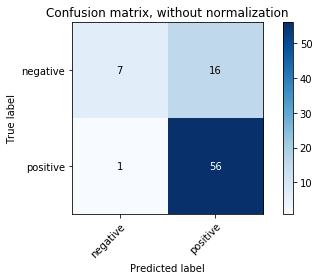

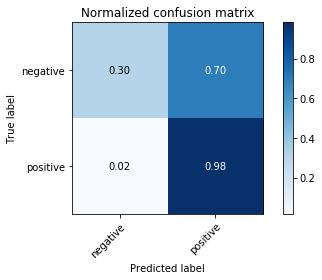

In [78]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization');

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix');

Abrimos mão (um pouco) do recall negativo, mas os positivos são quase perfeitos !

## Curiosidade:

Teste os seus dados com uma Random Forest. Eu não testei, mas aposto que é pior. Por que?


###### 22h30 - tentar antecipar no overall

In [79]:
from sklearn.ensemble import RandomForestClassifier
steps = [
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
]

pipeline = Pipeline(steps)
sentiment_analyzer = pipeline.fit(X_train, y_train)
y_pred = sentiment_analyzer.predict(X_test)

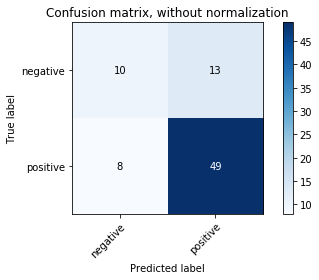

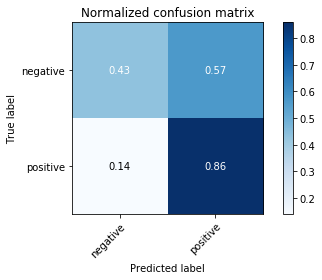

In [80]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization');

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix');

In [81]:
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

   negative       0.56      0.43      0.49        23
   positive       0.79      0.86      0.82        57

avg / total       0.72      0.74      0.73        80



Ganhamos quase 10% de recall nos negativos, mas perdemos 10% do recall nos positivos. Contudo, note que o recall negativo continua muito ruim (quase quanto jogar uma moeda). É isso que a gente quer?

## Da pra fazer ainda mais?

- [Embeddings](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture)

Depois da aula de Deep Learning !

- [W2V](https://www.distilled.net/word2vec-examples/) ou [aqui](https://skymind.ai/wiki/word2vec)
- [BERT](http://jalammar.github.io/illustrated-bert/)

***

###### Grande parte dessa aula foi inspirada na aula da Cintia do ultimo bootcamp, [lá ](https://github.com/somostera/tera-datascience-out2018/blob/master/26-nlp) tem alguns detalhes a mais de comparação do Spacy com o NLTK e algumas outras coisas que eu resolvi abordar diferente aqui :)